# adding packages

In [71]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib
from nilearn import plotting
from nilearn.image import mean_img, index_img
from nilearn.glm import first_level, threshold_stats_img

# adding files without loop



run1 = nib.load(r'E:\python in neuroimaging\sub2\func\run1\swarsub-02_ses-mri_task-facerecognition_run-01_bold.nii')
run2 = nib.load(r'E:\python in neuroimaging\sub2\func\run2\swarsub-02_ses-mri_task-facerecognition_run-02_bold.nii')
run3 = nib.load(r'E:\python in neuroimaging\sub2\func\run3\swarsub-02_ses-mri_task-facerecognition_run-03_bold.nii')
run4 = nib.load(r'E:\python in neuroimaging\sub2\func\run4\swarsub-02_ses-mri_task-facerecognition_run-04_bold.nii')
run5 = nib.load(r'E:\python in neuroimaging\sub2\func\run5\swarsub-02_ses-mri_task-facerecognition_run-05_bold.nii')
run6 = nib.load(r'E:\python in neuroimaging\sub2\func\run6\swarsub-02_ses-mri_task-facerecognition_run-06_bold.nii')
run7 = nib.load(r'E:\python in neuroimaging\sub2\func\run7\swarsub-02_ses-mri_task-facerecognition_run-07_bold.nii')
run8 = nib.load(r'E:\python in neuroimaging\sub2\func\run8\swarsub-02_ses-mri_task-facerecognition_run-08_bold.nii')
run9 = nib.load(r'E:\python in neuroimaging\sub2\func\run9\swarsub-02_ses-mri_task-facerecognition_run-09_bold.nii')



event1 = pd.read_table(r'E:\python in neuroimaging\sub2\func\run1\sub-02_ses-mri_task-facerecognition_run-01_events.tsv')
event2 = pd.read_table(r'E:\python in neuroimaging\sub2\func\run2\sub-02_ses-mri_task-facerecognition_run-02_events.tsv')
event3 = pd.read_table(r'E:\python in neuroimaging\sub2\func\run3\sub-02_ses-mri_task-facerecognition_run-03_events.tsv')
event4 = pd.read_table(r'E:\python in neuroimaging\sub2\func\run4\sub-02_ses-mri_task-facerecognition_run-04_events.tsv')
event5 = pd.read_table(r'E:\python in neuroimaging\sub2\func\run5\sub-02_ses-mri_task-facerecognition_run-05_events.tsv')
event6 = pd.read_table(r'E:\python in neuroimaging\sub2\func\run6\sub-02_ses-mri_task-facerecognition_run-06_events.tsv')
event7 = pd.read_table(r'E:\python in neuroimaging\sub2\func\run7\sub-02_ses-mri_task-facerecognition_run-07_events.tsv')
event8 = pd.read_table(r'E:\python in neuroimaging\sub2\func\run8\sub-02_ses-mri_task-facerecognition_run-08_events.tsv')
event9 = pd.read_table(r'E:\python in neuroimaging\sub2\func\run9\sub-02_ses-mri_task-facerecognition_run-09_events.tsv')


# adding files with loop


In [2]:
# Create a list of run numbers
run_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Create empty lists to store the NIFTI and TSV data
runs = []
events = []

# Loop through the run numbers
for run_num in run_numbers:
    # Load the NIFTI file
    run_path = f'E:\\python in neuroimaging\\sub2\\func\\run{run_num}\\swarsub-02_ses-mri_task-facerecognition_run-{run_num:02d}_bold.nii'
    run = nib.load(run_path)
    runs.append(run)
    
    # Read the TSV file
    event_path = f'E:\\python in neuroimaging\\sub2\\func\\run{run_num}\\sub-02_ses-mri_task-facerecognition_run-{run_num:02d}_events.tsv'
    event = pd.read_table(event_path)
    
    # Select the desired columns
    event = event[['stim_type', 'onset', 'duration']]
    events.append(event)

In [4]:
event1 = events[0]

In [5]:
event1

,stim_type,onset,duration
0,UNFAMILIAR,0.000,0.851
1,UNFAMILIAR,3.056,0.812
2,UNFAMILIAR,6.364,0.915
3,UNFAMILIAR,9.604,0.940
4,UNFAMILIAR,12.828,0.985
...,...,...,...
94,SCRAMBLED,382.753,0.894
95,SCRAMBLED,385.943,0.850
96,SCRAMBLED,388.951,0.830
97,SCRAMBLED,392.057,0.993


In [74]:
run_dir = os.path.dirname(runs[3].get_filename())
print(run_dir)

E:/python in neuroimaging/sub2/func/run4


In [6]:
run1 = runs[0]

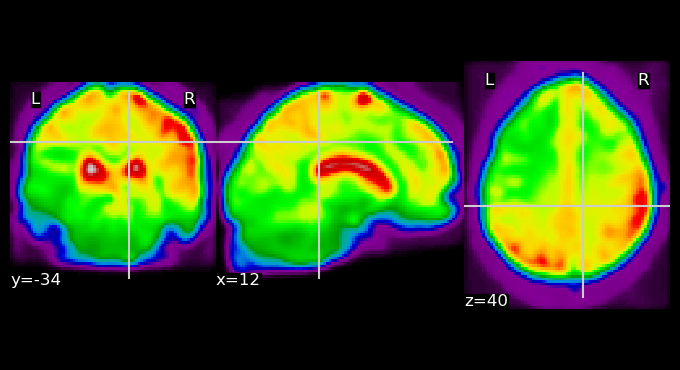

In [7]:
plotting.plot_epi(mean_img(run1))

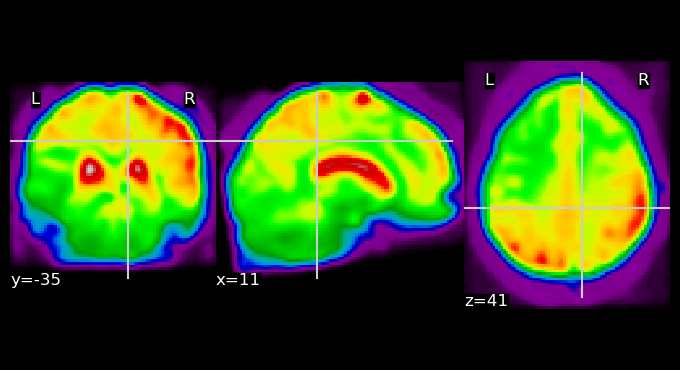

In [68]:
plotting.plot_epi(mean_img(runs[5]))

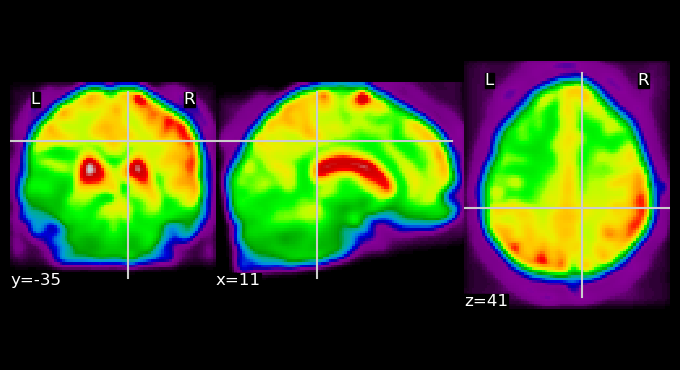

In [69]:
plotting.plot_epi(mean_img(runs[8]))

# defining tr, n_volumes, frame times

In [8]:
run1.shape

(79, 95, 79, 208)

In [9]:
tr = 2
n_volumes = run1.shape[3]
frame_times = np.arange(n_volumes) * tr


In [10]:
frame_times

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206,
       208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232,
       234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258,
       260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284,
       286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310,
       312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336,
       338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 36

# dropna And renaming stim type

In [16]:
for event in events:
    event = event.rename(columns={'stim_type': 'trial_type'})

In [21]:
for event in events:
    events[i] = event.dropna()

In [25]:
events[1]

,trial_type,onset,duration
0,UNFAMILIAR,0.000,0.875
1,SCRAMBLED,3.123,0.945
2,UNFAMILIAR,6.414,0.949
3,UNFAMILIAR,9.638,0.895
4,FAMOUS,12.778,0.937
...,...,...,...
92,UNFAMILIAR,375.804,0.992
93,UNFAMILIAR,379.161,0.880
94,FAMOUS,382.252,0.994
95,FAMOUS,385.459,0.821


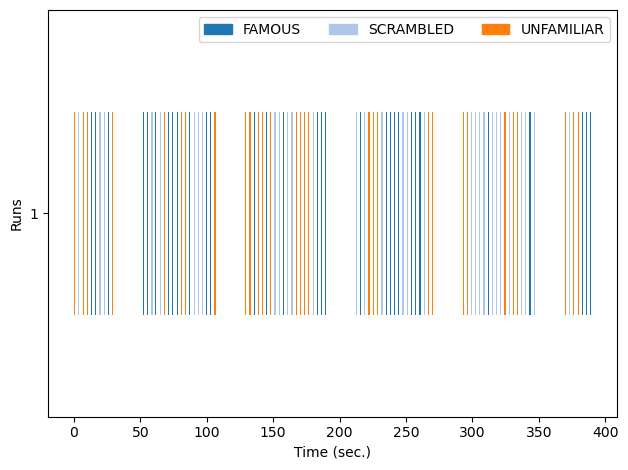

In [27]:
plotting.plot_event(events[1])
plt.show()

# defining design matrix

In [54]:
design_matrices = []

# Loop through each cleaned event to create the design matrices
for event in events:
    design_matrix = first_level.make_first_level_design_matrix(
        frame_times,
        event,
        drift_model='cosine',
        high_pass=0.01,
        hrf_model='spm'
    )
    design_matrices.append(design_matrix)

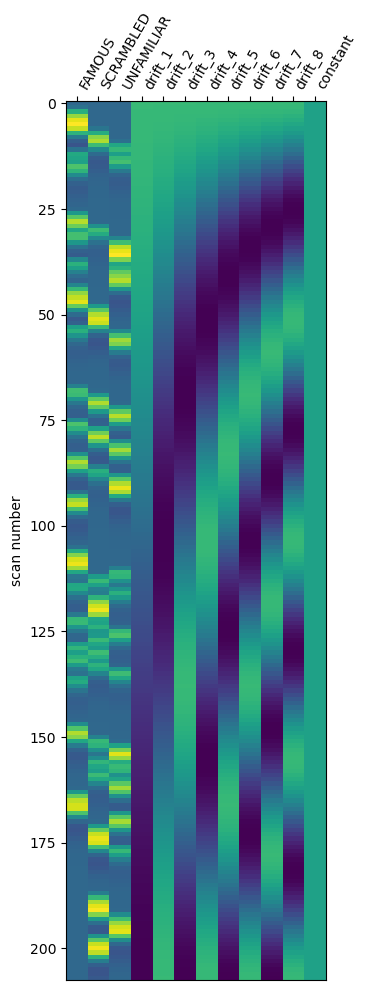

In [30]:
plotting.plot_design_matrix(design_matrices[0])
plotting.show()

In [60]:
design_matrices

[       FAMOUS  SCRAMBLED  UNFAMILIAR   drift_1   drift_2   drift_3   drift_4  \
 0    0.000000   0.000000    0.000000  0.098055  0.098047  0.098033  0.098013   
 2    0.018336   0.000000    0.000000  0.098033  0.097957  0.097832  0.097656   
 4    0.151729   0.000000    0.000000  0.097988  0.097779  0.097430  0.096942   
 6    0.262484   0.000000    0.000000  0.097921  0.097511  0.096828  0.095874   
 8    0.322187   0.000000    0.000000  0.097832  0.097153  0.096027  0.094456   
 ..        ...        ...         ...       ...       ...       ...       ...   
 406  0.000000   0.044933   -0.021274 -0.097832  0.097153 -0.096027  0.094456   
 408  0.000000  -0.015707   -0.012538 -0.097921  0.097511 -0.096828  0.095874   
 410  0.000000  -0.037057   -0.006522 -0.097988  0.097779 -0.097430  0.096942   
 412  0.000000  -0.037369   -0.003051 -0.098033  0.097957 -0.097832  0.097656   
 414  0.000000  -0.028758   -0.001263 -0.098055  0.098047 -0.098033  0.098013   
 
       drift_5   drift_6  

In [78]:
fmri_img = runs[0:9]
design_metrics = [design_matrices[0:9]]

In [79]:
num_runs = len(fmri_img)
print(f"Number of runs: {num_runs}")

Number of runs: 9


In [94]:
mean_image = mean_img(fmri_img)

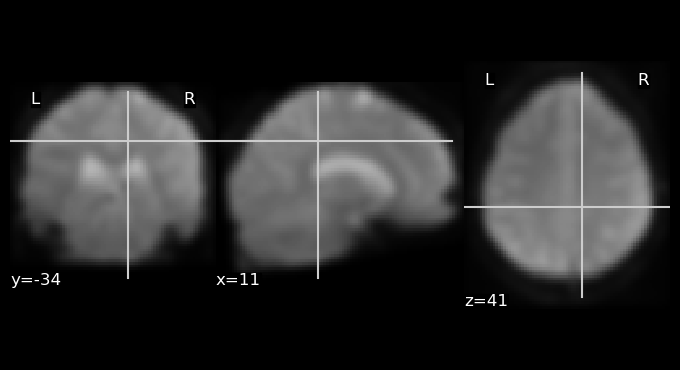

In [95]:
plotting.plot_anat(mean_image)


In [82]:
fmri_glm = first_level.FirstLevelModel()
fmri_glm2 = fmri_glm.fit(fmri_img, design_matrices = design_matrices)

# defining contrast vectors

In [83]:
design_matrix_run1 = design_matrices[0]


In [84]:
design_matrix_run1

,FAMOUS,SCRAMBLED,UNFAMILIAR,drift_1,drift_2,drift_3,drift_4,drift_5,drift_6,drift_7,drift_8,constant
0,0.000000,0.000000,0.000000,0.098055,0.098047,0.098033,0.098013,0.097988,0.097957,0.097921,0.097879,1.0
2,0.018336,0.000000,0.000000,0.098033,0.097957,0.097832,0.097656,0.097430,0.097153,0.096828,0.096452,1.0
4,0.151729,0.000000,0.000000,0.097988,0.097779,0.097430,0.096942,0.096316,0.095552,0.094653,0.093618,1.0
6,0.262484,0.000000,0.000000,0.097921,0.097511,0.096828,0.095874,0.094653,0.093167,0.091421,0.089419,1.0
8,0.322187,0.000000,0.000000,0.097832,0.097153,0.096027,0.094456,0.092450,0.090017,0.087168,0.083916,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
406,0.000000,0.044933,-0.021274,-0.097832,0.097153,-0.096027,0.094456,-0.092450,0.090017,-0.087168,0.083916,1.0
408,0.000000,-0.015707,-0.012538,-0.097921,0.097511,-0.096828,0.095874,-0.094653,0.093167,-0.091421,0.089419,1.0
410,0.000000,-0.037057,-0.006522,-0.097988,0.097779,-0.097430,0.096942,-0.096316,0.095552,-0.094653,0.093618,1.0
412,0.000000,-0.037369,-0.003051,-0.098033,0.097957,-0.097832,0.097656,-0.097430,0.097153,-0.096828,0.096452,1.0


In [85]:
contrast = np.eye(design_matrix_run1.shape[1])


In [86]:
contrast

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [87]:
base_cont = {}
for i, column in enumerate(design_matrix_run1.columns):
    base_cont[column] = contrast[i]

In [88]:
base_cont

{'FAMOUS': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'SCRAMBLED': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'UNFAMILIAR': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'drift_1': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'drift_2': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'drift_3': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'drift_4': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'drift_5': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'drift_6': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'drift_7': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'drift_8': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'constant': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

# Famous >> Scrambled

In [96]:
famous_scrambled = base_cont['FAMOUS'] - base_cont['SCRAMBLED']



In [97]:
famous_scrambled

array([ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

# Face >> Scrambled

In [98]:
face_scrambled = (base_cont['FAMOUS'] + base_cont['UNFAMILIAR']) / 2 - base_cont['SCRAMBLED']


In [99]:
face_scrambled

array([ 0.5, -1. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ])

# unfamiliar >> scrambled

In [101]:
unfamiliar_scrambled = base_cont['UNFAMILIAR'] - base_cont['SCRAMBLED']

In [102]:
unfamiliar_scrambled

array([ 0., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

# Famous >> Unfamiliar


In [103]:
famous_unfamiliar = base_cont['FAMOUS'] - base_cont['UNFAMILIAR']

In [104]:
famous_unfamiliar

array([ 1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

# contrasts plots

<AxesSubplot:label='conditions'>

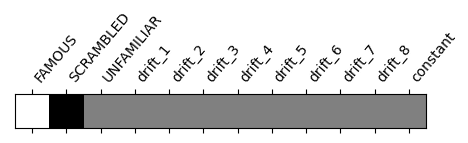

In [92]:
plotting.plot_contrast_matrix(famous_scrambled, design_matrices[1])


<AxesSubplot:label='conditions'>

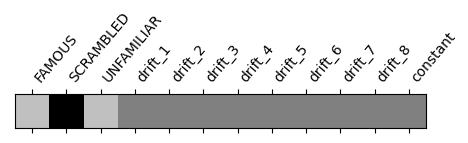

In [93]:
plotting.plot_contrast_matrix(face_scrambled, design_matrices[1])


<AxesSubplot:label='conditions'>

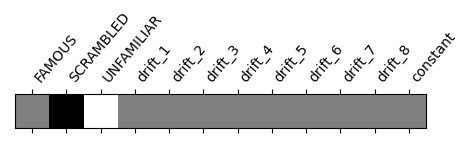

In [105]:
plotting.plot_contrast_matrix(unfamiliar_scrambled, design_matrices[1])


<AxesSubplot:label='conditions'>

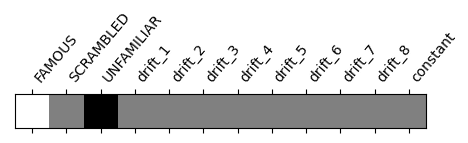

In [106]:
plotting.plot_contrast_matrix(famous_unfamiliar, design_matrices[1])


# Z maps

In [114]:
z_map1 = fmri_glm2.compute_contrast([famous_scrambled]*9, output_type = 'z_score')


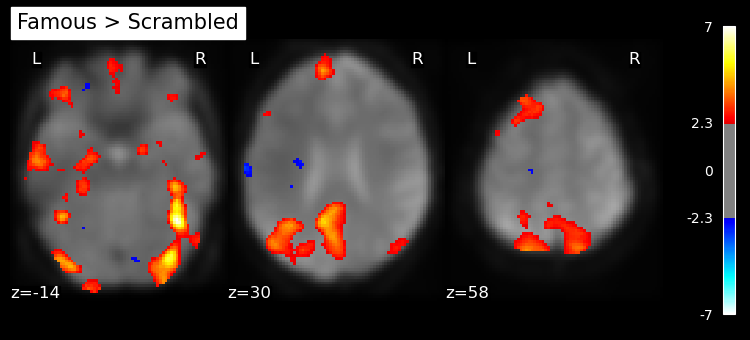

In [115]:
plotting.plot_stat_map(z_map1, bg_img = mean_image, threshold = 2.3, display_mode = 'z', cut_coords = 3, title = 'Famous > Scrambled')
##threshold?

In [116]:
z_map2 = fmri_glm2.compute_contrast([face_scrambled]*9, output_type = 'z_score')


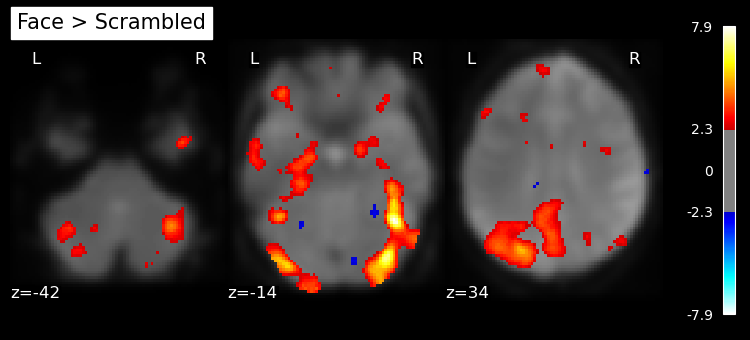

In [117]:
plotting.plot_stat_map(z_map2, bg_img = mean_image, threshold = 2.3, display_mode = 'z', cut_coords = 3, title = 'Face > Scrambled')


In [118]:
z_map3 = fmri_glm2.compute_contrast([unfamiliar_scrambled]*9, output_type = 'z_score')


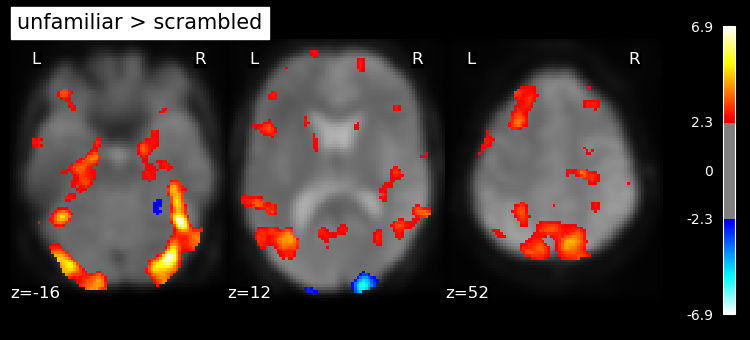

In [119]:
plotting.plot_stat_map(z_map3, bg_img = mean_image, threshold = 2.3, display_mode = 'z', cut_coords = 3, title = 'unfamiliar > scrambled')


In [120]:
z_map4 = fmri_glm2.compute_contrast([famous_unfamiliar]*9, output_type = 'z_score')


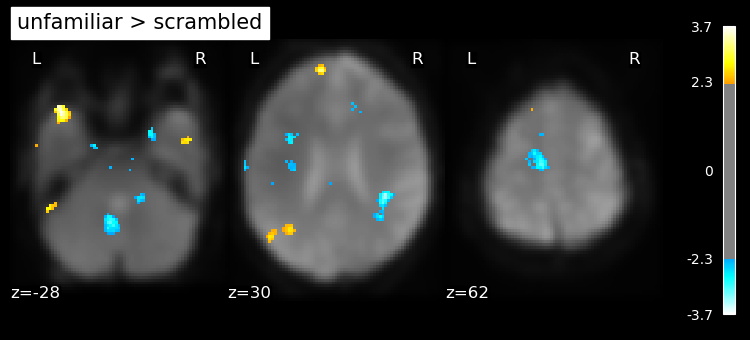

In [121]:
plotting.plot_stat_map(z_map4, bg_img = mean_image, threshold = 2.3, display_mode = 'z', cut_coords = 3, title = 'unfamiliar > scrambled')
